<a href="https://colab.research.google.com/github/oleksandragolub/Progetto-Machine-Learning/blob/main/progetto_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Machine Learning**

---
---

Università degli Studi Milano Bicocca \
CdLM Informatica — AA 2024/2025

---
---

#### **Componenti del gruppo:**
— Oleksandra Golub (856706) \
— Giovanni Bishara (869532) \
— Federico Brambilla (886046)

---
---

#### Librerie

Queste righe di codice importano le librerie, gli strumenti e abilitano tecniche avanzate di preprocessing:
- **matplotlib.pyplot** è una libreria per creare grafici e visualizzazioni (aiuta a visualizzare distribuzioni, istogrammi e grafici di correlazione).
- **kagglehub** è una libreria per scaricare dataset direttamente da Kaggle (permette di scaricare automaticamente i dati senza doverli caricare manualmente).
- il modulo **os** permette di interagire con il sistema operativo (utile per verificare la posizione di un dataset scaricato).
- **pandas** è una libreria per la gestione e manipolazione dei dataset (permette di leggere, analizzare e trasformare i dati in formato tabellare).
- **seaborn** è una libreria per la visualizzazione avanzata dei dati basata su **matplotlib** (aiuta a creare grafici più leggibili e dettagliati per analizzare le relazioni tra le variabili).
- **numpy** è una libreria per il calcolo numerico e la gestione degli array (utilizzata per manipolare dati numerici, eseguire calcoli e operazioni vettorial).
- **train_test_split** è una funzione di **scikit-learn** per suddividere i dati in training set e test set (permette di addestrare il modello su una parte dei dati e testarlo su un'altra parte per valutarne le prestazioni).
- **SMOTE** (Synthetic Minority Over-sampling Technique) è una tecnica di oversampling per bilanciare dataset sbilanciati. Genera nuovi esempi sintetici della classe minoritaria (es. se i pazienti diabetici sono meno numerosi, SMOTE genera nuovi dati simili per bilanciare il dataset).
- **StandardScaler** e **PowerTransformer** sono strumenti per trasformare e normalizzare i dati:
  1.   **StandardScaler** ridimensiona i dati in modo che abbiano *media 0* e *deviazione standard 1* (necessario per molti algoritmi di ML).
  2.   **PowerTransformer** applica una trasformazione (es. logaritmica) per rendere più normale la distribuzione dei dati.
- **enable_iterative_imputer** è necessario per abilitare **IterativeImputer**, che è ancora un'API sperimentale in **scikit-learn** (permette di eseguire un'imputazione avanzata dei valori mancanti stimandoli in base alle altre feature).
- **IterativeImputer** è un metodo per riempire i valori mancanti nei dati in modo intelligente (stima i valori basandosi sulle altre feature, anziché usare semplici medie o mediane).






In [37]:
import matplotlib.pyplot as plt
import os
import kagglehub
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.experimental import enable_iterative_imputer  # NECESSARIO per usare IterativeImputer
from sklearn.impute import IterativeImputer

---
---

#### Dataset
Queste righe di codice servono per scaricare, caricare e verificare il dataset sui pazienti diabetici:
1. Scaricamento del dataset da Kaggle
  - si utilizza `kagglehub.dataset_download("lara311/diabetes-dataset-using-many-medical-metrics")` per scaricare automaticamente il dataset "`diabetes-dataset-using-many-medical-metrics`" da [Kaggle](https://www.kaggle.com/datasets/lara311/diabetes-dataset-using-many-medical-metrics/data).
  - la variabile `dataset_path` conterrà il percorso della cartella in cui il dataset è stato salvato.
  - il percorso del dataset viene stampato per verificare che l'operazione sia riuscita correttamente.

2. Definizione del percorso locale del dataset
  - `dataset_path` viene definito manualmente per specificare dove è stato scaricato il dataset.
  - normalmente, kagglehub salva i file in una cartella cache, quindi impostiamo manualmente il percorso corretto per evitarne la ricerca.
  - alcune versioni di kagglehub non restituiscono il percorso completo del dataset, quindi questa operazione aiuta a evitare problemi di accesso ai file.

3. Verifica dei file scaricati
  - `os.listdir(dataset_path)` stampa l'elenco dei file presenti nella cartella del dataset.
  - questo permette di verificare quali file sono stati effettivamente scaricati.
  - è utile soprattutto quando non si è sicuri del nome esatto del file CSV nel dataset.

4. Caricamento del dataset in Pandas
  - `pd.read_csv(dataset_path + "/diabetes (1).csv")` legge il file CSV e lo carica in un DataFrame Pandas.

Ora il dataset è pronto per essere esplorato e analizzato con Pandas!

In [38]:
dataset_path = kagglehub.dataset_download("lara311/diabetes-dataset-using-many-medical-metrics")
print("Il dataset è stato scaricato in:", dataset_path)

dataset_path = "/root/.cache/kagglehub/datasets/lara311/diabetes-dataset-using-many-medical-metrics/versions/1"

print(os.listdir(dataset_path))

df = pd.read_csv(dataset_path + "/diabetes (1).csv")

Il dataset è stato scaricato in: /root/.cache/kagglehub/datasets/lara311/diabetes-dataset-using-many-medical-metrics/versions/1
['diabetes (1).csv']


---
---
#### Caratteristiche del dataset originale
Questa sezione include una serie di analisi preliminari per comprendere la struttura, la distribuzione e le relazioni tra le feature del dataset prima di qualsiasi preprocessing.

*   `df.shape` mostra il numero di righe e colonne del dataset.


In [39]:
df.shape

(768, 9)

*  `df` visualizza tutto il dataset presente nel DataFrame Pandas.




In [40]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


CAPIRE SE SERVONO CAST VARI

Grandezza del dataset

Variabili

*  `df.info()` fornisce informazioni riassuntive sulla struttura del DataFrame Pandas, dove:
  - `<class 'pandas.core.frame.DataFrame'>` indica che il dataset è un oggetto di tipo DataFrame di Pandas.
  - `RangeIndex: 768 entries, 0 to 767` indica che il dataset ha 768 righe, numerate da 0 a 767.
  - `Data columns (total 9 columns)`indica che il dataset contiene 9 colonne.
  - Dettagli delle colonne includono i nominativi delle colonne, Non-Null Count (si vede che tutte le colonne hanno 768 valori non nulli, quindi non ci sono valori mancanti) e Dtype (per indicare colonne che contengono numeri interi e colonne che contengono numeri decimali)
  - `dtypes: float64(2), int64(7)` indica che nel dataset ci sono 2 colonne con tipo float64 (numeri decimali) e 7 colonne con tipo int64 (numeri interi).
  - `memory usage: 54.1 KB`indica che il dataset occupa 54.1 KB di memoria.

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


*  `df.describe()` mostra le statistiche principali di ogni feature numerica:
  - media, deviazione standard, minimo, massimo, quartili (25%, 50%, 75%).
  - aiuta a individuare valori anomali (outlier) o distribuzioni non bilanciate.

In [42]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


* `df.head()` restituisce le prime 5 righe (di default) del DataFrame Pandas. È utile per verificare se i dati sono stati caricati correttamente e per analizzare un'anteprima del dataset.

In [43]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


---
---

#### Comprensione del quadro generale e obiettivo

* `df["Outcome"].value_counts()` restituisce il conteggio di ogni valore unico presente nella colonna `Outcome` del DataFrame Pandas. Questo è utile per verificare la distribuzione delle classi nel dataset e **determinare se è bilanciato o meno**.
  - colonna `Outcome` del DataFrame rappresenta l'etichetta target, dove `1` indica la presenza di diabete, mentre `0` indica l'assenza di diabete.
  - `.value_counts()` conta il numero di occorrenze di ciascun valore unico presente nella colonna.

* Interpretazione:
  - Valore 0 (assenza di diabete): si verifica 500 volte nel dataset.
  - Valore 1 (presenza di diabete): si verifica 268 volte nel dataset. \

Dunque, questo mostra che il dataset non è bilanciato, perché la classe 0 (assenza di diabete) è molto più numerosa della classe 1 (presenza di diabete). Questa situazione può influenzare negativamente i modelli di machine learning, rendendoli meno efficaci nel predire la classe meno rappresentata.

In [44]:
df["Outcome"].value_counts()

,count
Outcome,
0,500
1,268


* sns.countplot(x='Outcome', data=df):
  - si usa **seaborn**, una libreria per la visualizzazione dei dati, per creare un grafico a barre che conta la frequenza di ciascun valore nella colonna `Outcome`.
  - `x='Outcome'` specifica che i valori della colonna `Outcome` saranno visualizzati sull'asse x.
  - `data=df` specifica che i dati sono contenuti nel DataFrame `df`.

In altre parole, questo blocco di codice è usato per visualizzare graficamente la distribuzione delle classi nella colonna `Outcome` del dataset. Questa distribuzione rappresenta il bilanciamento tra i valori target, ossia `0` (assenza di diabete) e `1` (presenza di diabete).

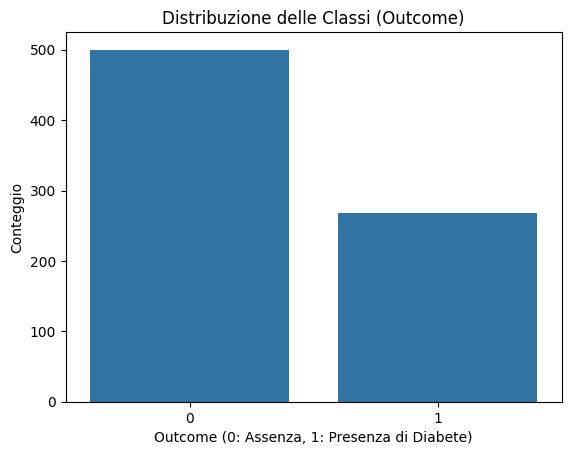

In [45]:
sns.countplot(x='Outcome', data=df)
plt.title("Distribuzione delle Classi (Outcome)")
plt.xlabel("Outcome (0: Assenza, 1: Presenza di Diabete)")
plt.ylabel("Conteggio")
plt.show()

Questo pezzo di codice genera istogrammi per visualizzare la distribuzione di tutte le variabili numeriche nel dataset, escludendo la colonna `Outcome`:
 - `df.drop(columns=["Outcome"])` crea un nuovo DataFrame temporaneo, escludendo la colonna `Outcome`, che è una variabile categoriale (0 e 1). Questo assicura che gli istogrammi vengano generati **solo per le feature continue**.
 - `.hist()` genera istogrammi per tutte le colonne numeriche rimanenti.

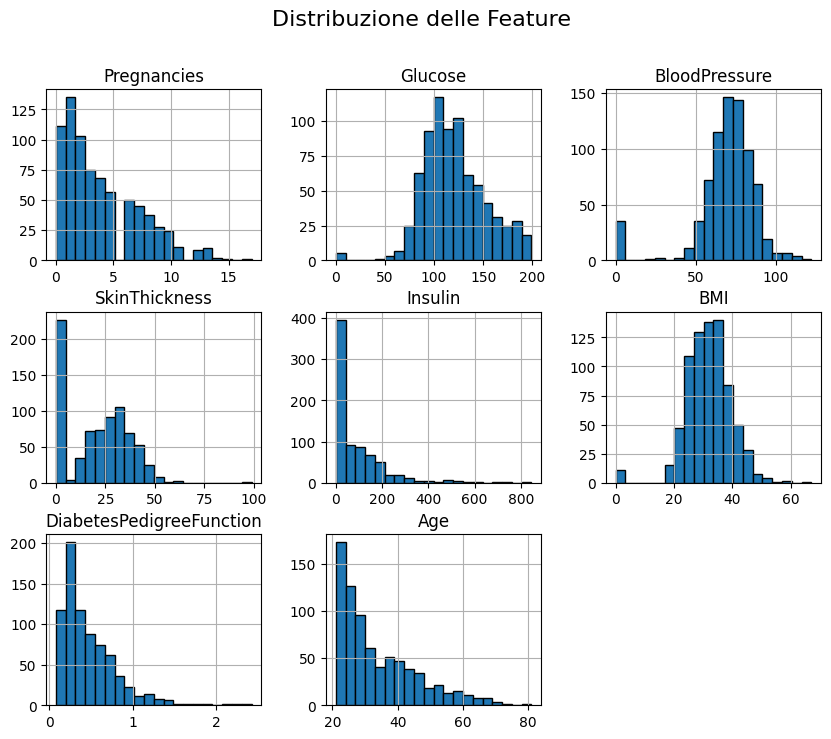

In [46]:
df.drop(columns=["Outcome"]).hist(figsize=(10, 8), bins=20, edgecolor='black')
plt.suptitle('Distribuzione delle Feature', fontsize=16)
plt.show()

Questo pezzo di codice crea dei grafici di densità (KDE - Kernel Density Estimation) per ogni feature del dataset bilanciato `X_resampled` (dopo aver applicato SMOTE). I grafici mostrano la distribuzione probabilistica delle variabili, aiutando a visualizzare la forma dei dati e la loro variazione.

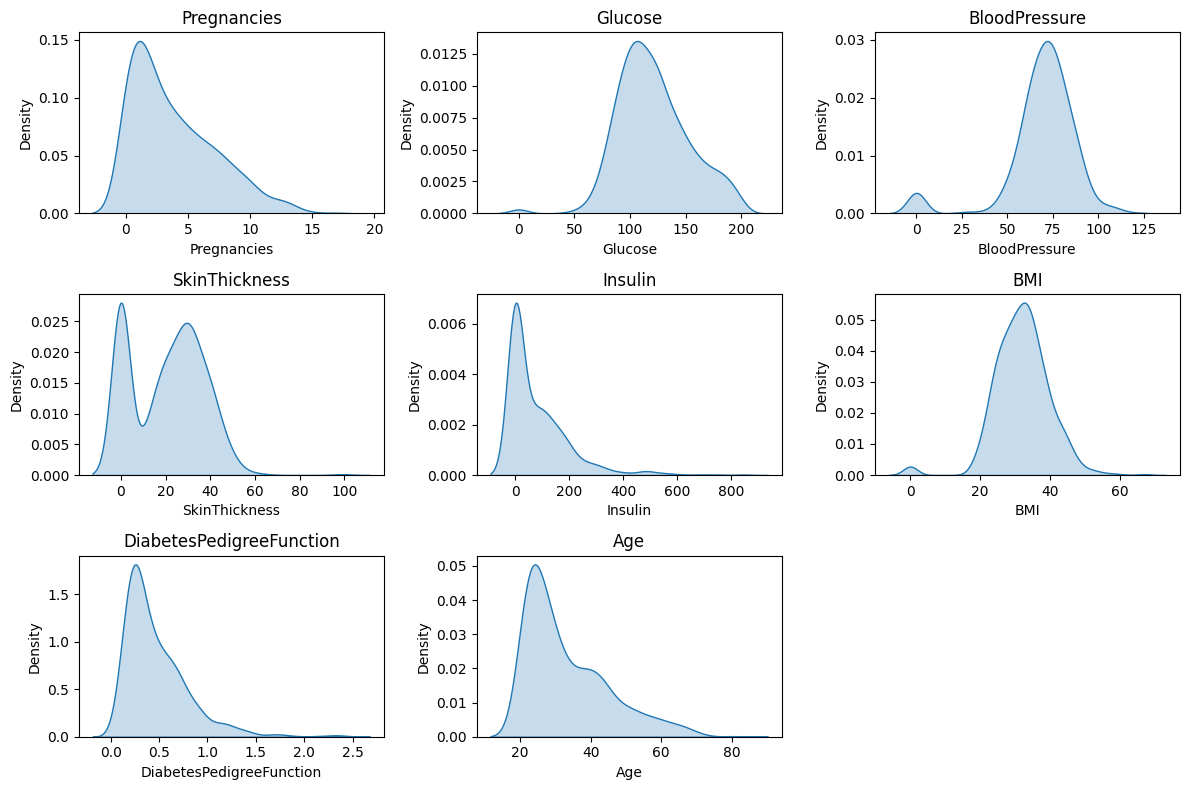

In [47]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.drop(columns=["Outcome"]).columns):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(data=df, x=col, fill=True)
    plt.title(col)
plt.tight_layout()
plt.show()

Osservazioni sulle distribuzioni:
  1.   Pregnancies:
    - distribuzione **asimmetrica verso destra**.
    - la maggior parte dei valori è concentrata vicino a `0-5` gravidanze.
    - ci sono alcune persone con molte gravidanze `(>10)`, che possono essere considerate **outlier**.

  2.   Glucose:
    - distribuzione quasi normale, ma **leggermente spostata verso destra**.
    - alcuni valori sono estremamente alti `(>200)`, che potrebbero indicare pazienti con **problemi gravi di diabete** o **potenziali outlier**.

  3.   BloodPressure:
      - distribuzione centrata intorno a `70-80 mm Hg`, con una **forma simmetrica**.
      -**non ci sono** valori estremamente bassi o alti che sembrano problematici.

  4.   SkinThickness:
    - distribuzione **asimmetrica** con un **picco** intorno a `20 mm`.
    - **non ci sono** valori estremamente bassi o alti che sembrano problematici.

  5.   Insulin:
    - distribuzione **molto asimmetrica** con un **picco** vicino a `0`.
    - **molti valori a 0** suggeriscono **valori mancanti** o **non registrati**.

  6.   BMI:
    - distribuzione **asimmetrica verso destra**.
    - alcuni valori estremamente alti `(>50)` potrebbero rappresentare **outlier** o pazienti con **obesità estrema**.

  7.   DiabetesPedigreeFunction:
    - distribuzione **altamente asimmetrica** con un **picco** intorno a `0.2-0.4`.
    - alcuni valori molto alti **(>1.5)** sono **rari** e potrebbero essere considerati **outlier**.

  8.   Age:
    - distribuzione **asimmetrica** con la maggior parte dei pazienti concentrati `tra 20 e 40 anni`.
    - un numero ridotto di pazienti è più anziano `(>60 anni)`, ma ciò è previsto in un dataset sulla salute.

Cosa indicano questi grafici:
  1. Valori mancanti:
    - alcune colonne (es. SkinThickness e Insulin) mostrano una **forte concentrazione di valori a 0**, che potrebbero rappresentare **dati non registrati**.
  2. Outlier:
    - alcune colonne (es. Pregnancies, Glucose, BMI) presentano **valori estremi** che potrebbero essere **outlier**. Questi dovrebbero essere gestiti attentamente tramite rimozione o trasformazioni logaritmiche.
  3. Distribuzioni asimmetriche:
    - alcuni variabili (es. DiabetesPedigreeFunction e Insulin) hanno **distribuzioni molto asimmetriche**. Questo potrebbe richiedere trasformazioni logaritmiche o power transformations.
  4. Distribuzioni normali:
    - alcuni variabili (es. BloodPressure e Glucose) sono più **vicine a una distribuzione normale**, quindi sono meno problematiche per la modellazione.  


Questo pezzo di codice visualizza una matrice di correlazione tra le feature numeriche nel dataset, rappresentata visivamente come una heatmap:
- ogni cella rappresenta la correlazione tra due variabili.
- colori diversi indicano l'intensità della correlazione. \

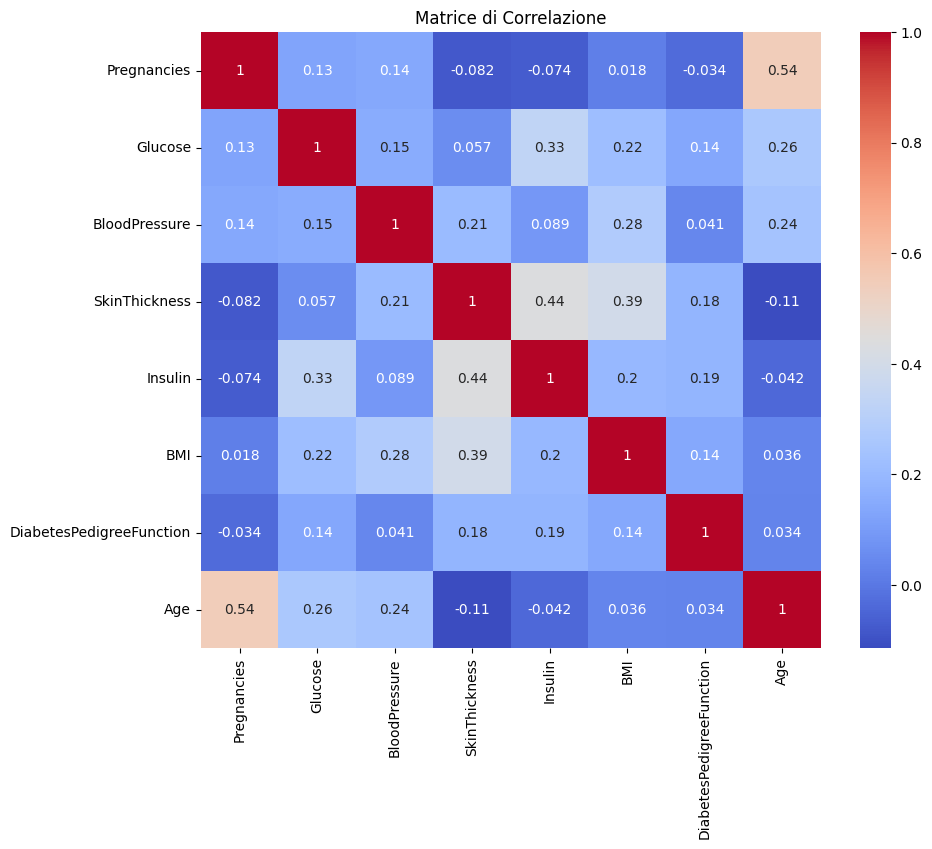

In [48]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop(columns=["Outcome"]).corr(), annot=True, cmap='coolwarm')
plt.title('Matrice di Correlazione')
plt.show()

Osservazioni Generali:
1. Colore e valore della correlazione:
  - **blu scuro** indica correlazioni **deboli** o **negative**.
  - **rosso** più intenso indica correlazioni **forti** e **positive**.
  - valori **vicini a 1 o -1** indicano una correlazione **forte**.
  - valori **vicini a 0** indicano una correlazione **debole** o **assente**.

2. La diagonale principale (valore 1):
  - rappresenta la correlazione di ogni variabile **con se stessa** (sempre 1).

Analisi delle relazioni principali:
1. Correlazioni alte (moderate o significative):
  - Pregnancies e Age (0.54):
    - una correlazione positiva moderata.
    - è ragionevole perché l'età avanzata è associata a un numero maggiore di gravidanze.

  - SkinThickness e Insulin (0.44):
    - questa correlazione positiva potrebbe indicare che i livelli di insulina influenzano lo spessore del tessuto cutaneo o viceversa.

  - BMI e SkinThickness (0.39):
    - una correlazione positiva moderata che potrebbe suggerire che un indice di massa corporea più elevato sia associato a un maggiore spessore della pelle.

  - Glucose e Insulin (0.33):
    - una correlazione positiva che suggerisce una possibile relazione tra livelli di glucosio e insulina nel sangue.

2. Correlazioni moderate:
  - BMI e BloodPressure (0.28):
    - una correlazione positiva moderata
    - è plausibile, poiché l'indice di massa corporea più elevato può influenzare la pressione sanguigna.

  - Age e Glucose (0.26):
    - suggerisce che i livelli di glucosio tendono a essere più alti con l'età.

  - BloodPressure e Age (0.24):
    - una correlazione moderata, che potrebbe riflettere un aumento della pressione arteriosa con l'avanzare dell'età.

3. Correlazioni deboli o negative:
  - SkinThickness e Age (-0.11):
    - una correlazione negativa debole, suggerendo che lo spessore cutaneo non aumenta necessariamente con l'età.

  - Pregnancies e altre variabili (valori bassi, vicini a 0):
    - le gravidanze non sembrano essere fortemente correlate con altre caratteristiche (eccetto l'età).

  - DiabetesPedigreeFunction e altre variabili (valori bassi):
    - questa variabile, che rappresenta una funzione genetica, non sembra avere una relazione lineare forte con altre caratteristiche.

Conclusioni:
- Le variabili **Pregnancies, Age, BMI e Glucose** mostrano alcune correlazioni significative con altre feature, indicando che potrebbero avere un ruolo importante nella previsione del diabete.

- La correlazione tra **SkinThickness e Insulin** merita particolare attenzione, poiché suggerisce una relazione potenziale che potrebbe essere importante per l'analisi.

- Variabili come **DiabetesPedigreeFunction** mostrano deboli correlazioni, suggerendo che la loro influenza potrebbe essere indipendente o non lineare.

Passi successivi:

- Feature Engineering:
  - variabili con correlazioni moderate o deboli potrebbero essere trasformate o combinate per creare nuove feature.


---
---

#### Preprocessing del dataset

In [49]:
# Gestione valori mancanti: Sostituisco 0 con NaN per le feature critiche
columns_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_to_fix] = df[columns_to_fix].replace(0, np.nan)

print(" Valori nulli dopo aver sostituito 0 con NaN:**")
print(df.isnull().sum())


 Valori nulli dopo aver sostituito 0 con NaN:**
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [50]:
# Imputazione avanzata dei valori mancanti con IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=42)
df[columns_to_fix] = imputer.fit_transform(df[columns_to_fix])

print("Valori nulli dopo IterativeImputer:**")
print(df.isnull().sum())

Valori nulli dopo IterativeImputer:**
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [51]:
# Feature Engineering: Aggiunta di nuove colonne
df['BMI_Age'] = df['BMI'] * df['Age']
df['Glucose_BMI'] = df['Glucose'] * df['BMI']
df['Glucose_Age'] = df['Glucose'] / (df['Age'] + 1)  # Evita divisioni per zero

print("Nuove Feature Aggiunte:**")
print(df.head())

Nuove Feature Aggiunte:**
   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0      35.000000  212.347446  33.6   
1            1     85.0           66.0      29.000000   66.407208  26.6   
2            8    183.0           64.0      21.486494  272.954432  23.3   
3            1     89.0           66.0      23.000000   94.000000  28.1   
4            0    137.0           40.0      35.000000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  Outcome  BMI_Age  Glucose_BMI  Glucose_Age  
0                     0.627   50        1   1680.0       4972.8     2.901961  
1                     0.351   31        0    824.6       2261.0     2.656250  
2                     0.672   32        1    745.6       4263.9     5.545455  
3                     0.167   21        0    590.1       2500.9     4.045455  
4                     2.288   33        1   1422.3       5904.7     4.029412  


In [52]:
# Separazione feature e target
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

In [53]:
# Standardizzazione PRIMA di SMOTE
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Dati Standardizzati (prime 5 righe):**")
print(pd.DataFrame(X_scaled, columns=X.columns).head())

Dati Standardizzati (prime 5 righe):**
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.865712      -0.031464       0.653773  0.622036  0.168215   
1    -0.844885 -1.203922      -0.526443       0.023779 -0.877024 -0.849821   
2     1.233880  2.015509      -0.691436      -0.765131  1.244574 -1.329752   
3    -0.844885 -1.072516      -0.526443      -0.606215 -0.593598 -0.631670   
4    -1.141852  0.504348      -2.671352       0.653773  0.166510  1.549835   

   DiabetesPedigreeFunction       Age   BMI_Age  Glucose_BMI  Glucose_Age  
0                  0.468492  1.425995  1.365022     0.663717    -0.738021  
1                 -0.365061 -0.190672 -0.584052    -1.178839    -0.931498  
2                  0.604397 -0.105584 -0.764058     0.182049     1.343508  
3                 -0.920763 -1.041549 -1.118373    -1.015837     0.162384  
4                  5.484909 -0.020496  0.777839     1.296905     0.149751  


In [54]:
# Applicazione di SMOTE per bilanciare il dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

print("Distribuzione delle classi dopo SMOTE:**")
print(y_resampled.value_counts())

Distribuzione delle classi dopo SMOTE:**
Outcome
1    500
0    500
Name: count, dtype: int64


Dopo il feature engineering, sono stati aggiunti 3 nuove feature:
1.   BMI_Age = BMI * Age
2.   Glucose_BMI = Glucose * B
3.   Glucose_Age = Glucose / (Age + 1)

Ora, il dataset ha:
*   8 feature originali
*   +3 feature aggiuntive
*   = 11 feature totali

Nota: quando si esegue X = df.drop(columns=["Outcome"]), si rimuove la colonna Outcome, lasciando tutte le 11 feature nel dataset.

In [55]:
# Divisione Training e Test set (70% Training, 30% Test)
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

print("Dimensioni dei dataset:")
print(f"Train Set: {x_train.shape}, Test Set: {x_test.shape}")

Dimensioni dei dataset:
Train Set: (700, 11), Test Set: (300, 11)


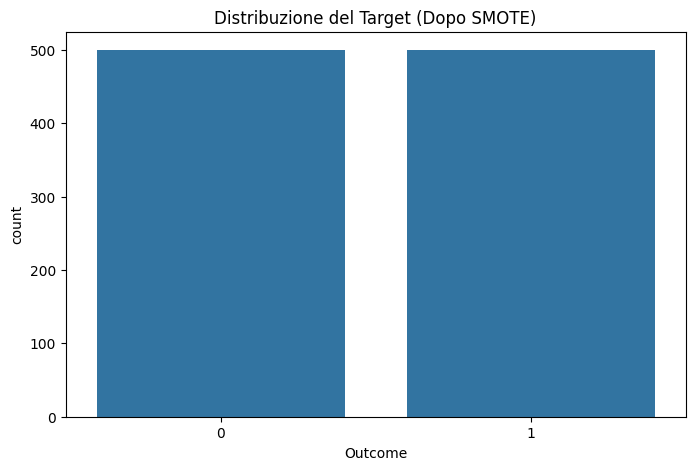

In [56]:
# Visualizzazione della distribuzione del target bilanciato
plt.figure(figsize=(8,5))
sns.countplot(x=y_resampled)
plt.title('Distribuzione del Target (Dopo SMOTE)')
plt.show()

In [57]:
# Scaling the features
# normalizza i dati per evitare problemi di scale diverse tra le feature
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

In [58]:
########################################################################################## DATASET CON SMOTE ############################################################################################


# Separare le feature (X) e il target (y)
X = df.drop(columns=["Outcome"])  # Rimuove la colonna target e lascia solo le feature
y = df["Outcome"]  # La colonna target

# Applicare SMOTE per bilanciare il dataset
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Controllare la nuova distribuzione delle classi
print(y_resampled.value_counts())  # Ora le classi dovrebbero essere bilanciate

# Dopo SMOTE, i dati bilanciati sono X_resampled e y_resampled

Outcome
1    500
0    500
Name: count, dtype: int64


In [59]:
# Dataset information
pd.DataFrame(X_resampled, columns=X.columns).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1000 non-null   int64  
 1   Glucose                   1000 non-null   float64
 2   BloodPressure             1000 non-null   float64
 3   SkinThickness             1000 non-null   float64
 4   Insulin                   1000 non-null   float64
 5   BMI                       1000 non-null   float64
 6   DiabetesPedigreeFunction  1000 non-null   float64
 7   Age                       1000 non-null   int64  
 8   BMI_Age                   1000 non-null   float64
 9   Glucose_BMI               1000 non-null   float64
 10  Glucose_Age               1000 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 86.1 KB


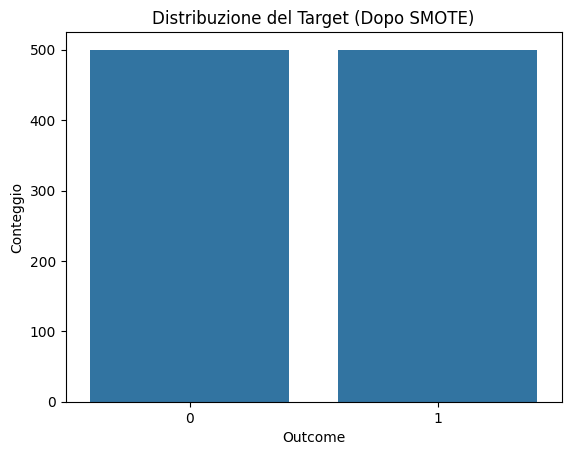

In [60]:
# Visualizzare la distribuzione del target bilanciato (y_resampled)
sns.countplot(x=pd.DataFrame(y_resampled, columns=["Outcome"])["Outcome"])
plt.title('Distribuzione del Target (Dopo SMOTE)')
plt.xlabel('Outcome')
plt.ylabel('Conteggio')
plt.show()

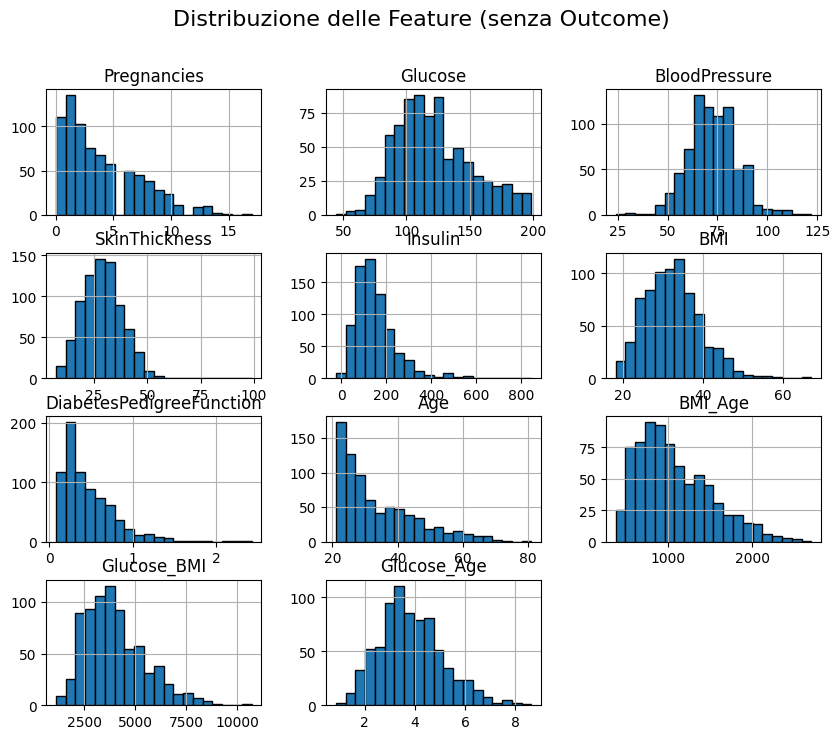

In [61]:
# Statistical summary
df.drop(columns=["Outcome"]).hist(figsize=(10, 8), bins=20, edgecolor='black')
plt.suptitle('Distribuzione delle Feature (senza Outcome)', fontsize=16)
plt.show()

ValueError: num must be an integer with 1 <= num <= 9, not 10

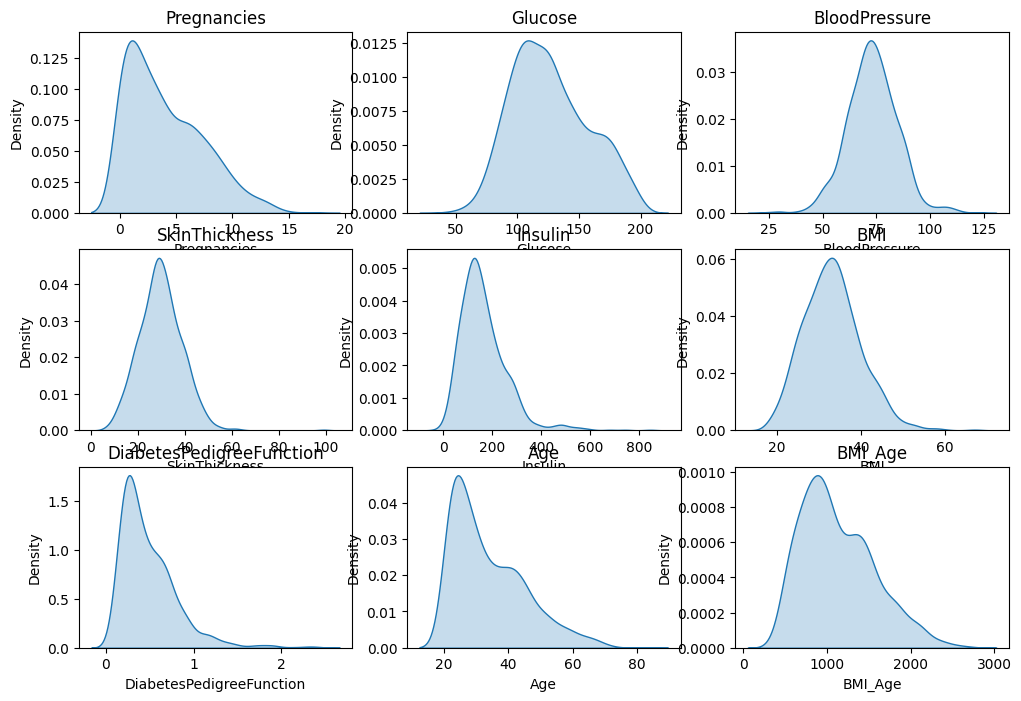

In [62]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(X_resampled.columns):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(data=pd.DataFrame(X_resampled, columns=X.columns), x=col, fill=True)
    plt.title(col)
plt.tight_layout()
plt.show()

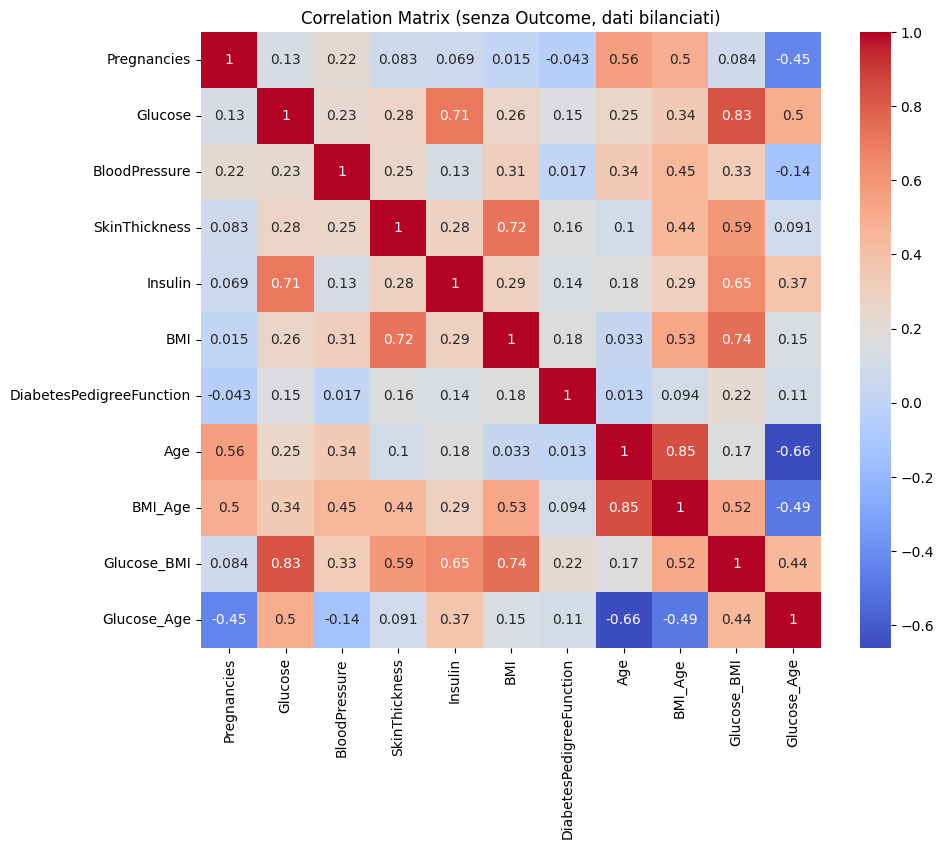

In [63]:
# Analizza solo i dati bilanciati, che saranno effettivamente usati nel training.

plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(X_resampled, columns=X.columns).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (senza Outcome, dati bilanciati)')
plt.show()

In [64]:
# Controllare la presenza di valori mancanti (valori nulli) nel dataset
missing_values = df.isnull().sum()
print("Valori nulli:\n", missing_values)

Valori nulli:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
BMI_Age                     0
Glucose_BMI                 0
Glucose_Age                 0
dtype: int64


In [65]:
# Percentuale di valori nulli per ogni colonna
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("Percentuale di valori nulli:\n", missing_percentage)

Percentuale di valori nulli:
 Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
BMI_Age                     0.0
Glucose_BMI                 0.0
Glucose_Age                 0.0
dtype: float64


In [66]:
# Sostituire gli zeri con NaN nelle colonne critiche
columns_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_to_fix] = df[columns_to_fix].replace(0, np.nan)

# Stampare il numero di valori nulli dopo la sostituzione
print("Valori nulli dopo aver sostituito gli zeri:\n", df.isnull().sum())

Valori nulli dopo aver sostituito gli zeri:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
BMI_Age                     0
Glucose_BMI                 0
Glucose_Age                 0
dtype: int64


In [67]:
# Riempire i valori nulli con la mediana della colonna
df.fillna(df.median(), inplace=True)

# Controllare se ci sono ancora valori nulli
print("Valori nulli dopo la pulizia:\n", df.isnull().sum())

Valori nulli dopo la pulizia:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
BMI_Age                     0
Glucose_BMI                 0
Glucose_Age                 0
dtype: int64


In [68]:
# Controllare i duplicati
duplicates = df.duplicated().sum()
print(f"Numero di righe duplicate: {duplicates}")

# Rimuovere eventuali duplicati
if duplicates > 0:
    df = df.drop_duplicates()


Numero di righe duplicate: 0


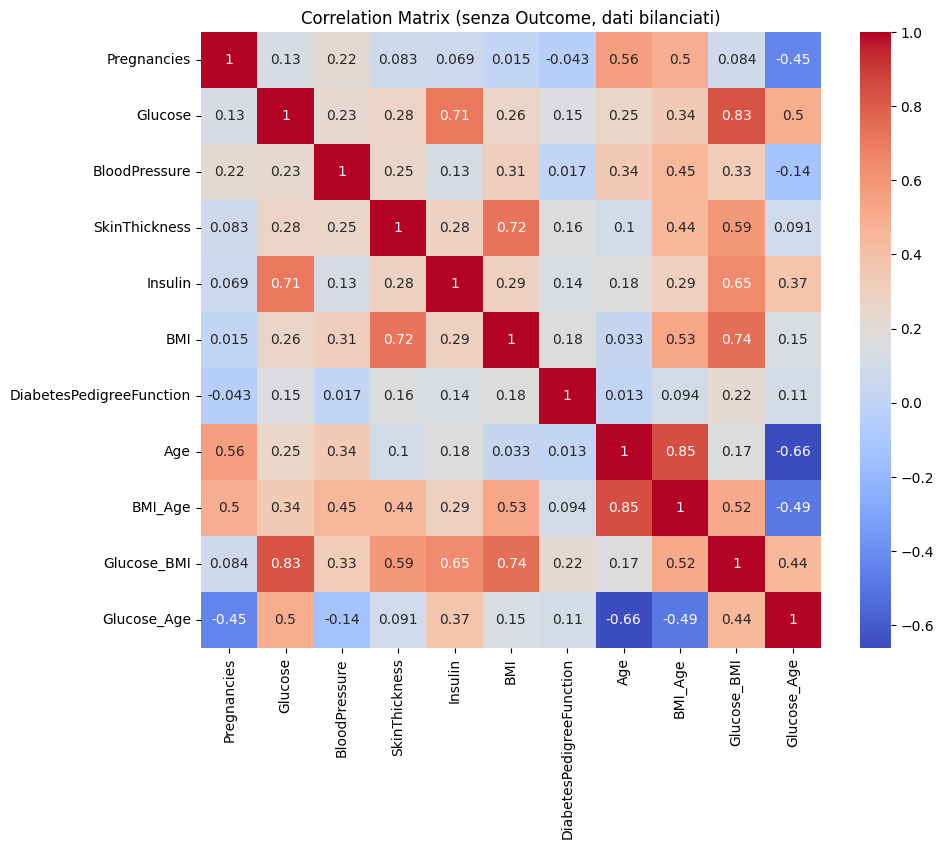

In [69]:
# Analizza solo i dati bilanciati, che saranno effettivamente usati nel training.

plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(X_resampled, columns=X.columns).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (senza Outcome, dati bilanciati)')
plt.show()

In [70]:
# Feature and target separation
x = X_resampled
y = y_resampled

In [71]:
# Split the data into training and testing sets
# 70% Training, 30% Test
x_train, x_test, y_train, y_test = train_test_split(
    X_resampled_scaled, y_resampled, test_size=0.3, random_state=42
)


# 80% Training, 20% Test
#x_train, x_test, y_train, y_test = train_test_split(
#    X_resampled_scaled, y_resampled, test_size=0.2, random_state=42
#)

Numero di componenti principali selezionate: 11
Varianza spiegata da ciascuna componente: [0.36104934 0.24156772 0.1199531  0.08856904 0.06847161 0.05156278
 0.03325009 0.0292682  0.00405724 0.00134859 0.00090227]
Varianza cumulativa: [0.36104934 0.60261707 0.72257017 0.81113921 0.87961082 0.9311736
 0.96442369 0.99369189 0.99774913 0.99909773 1.        ]


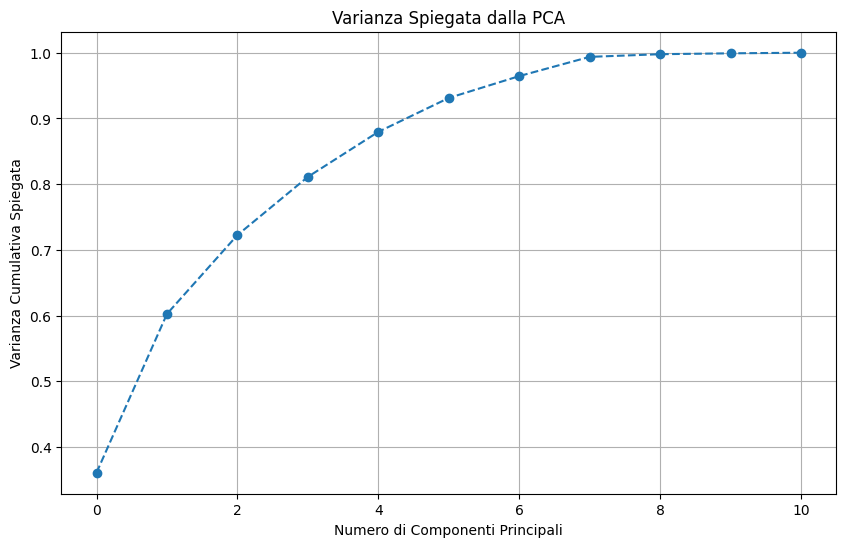

In [72]:

# NON USARE
# DANNEGGIA NOSTRO PROGETTO


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 3. Applicare PCA
# pca = PCA(n_components=0.99)  # Mantiene il 95% della varianza
# X_pca = pca.fit_transform(X_scaled)

pca = PCA(n_components=len(X_resampled.columns))  # Mantiene tutte le componenti principali
X_pca = pca.fit_transform(X_scaled)

# 4. Controllare quante componenti principali sono state mantenute
print(f"Numero di componenti principali selezionate: {X_pca.shape[1]}")

# Mostra la varianza spiegata da ogni componente
explained_variance = pca.explained_variance_ratio_
print(f"Varianza spiegata da ciascuna componente: {explained_variance}")

# Mostra il numero di componenti necessarie per raggiungere il 95% della varianza
cumulative_variance = np.cumsum(explained_variance)
print(f"Varianza cumulativa: {cumulative_variance}")

# 5. Visualizzare la varianza spiegata da ogni componente
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Numero di Componenti Principali')
plt.ylabel('Varianza Cumulativa Spiegata')
plt.title('Varianza Spiegata dalla PCA')
plt.grid()
plt.show()